In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label,regionprops
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import distance

In [2]:
from Nodule_Segmentation import *

## Import de nodule_mask.npzet lung_img.npz

In [3]:
INPUT_FOLDER = '/Users/anthonypamart/Documents/SIR/Projets/CEI/15mars/slices'
patients_short = os.listdir(INPUT_FOLDER)

images = os.listdir(INPUT_FOLDER)
images_path = [os.path.join(INPUT_FOLDER,patient) for patient in patients_short]

In [133]:
##On crée 2 listes dans lesquels on écrit respectivement les paths des lung_img et les paths des nodule_mask 
images_path_lung_img = []
images_path_nodule_mask = []
for i in range(0,len(images_path)):
    if(images_path[i][-19:-8]=='nodule_mask'):
        images_path_nodule_mask.append(images_path[i])
    elif(images_path[i][-16:-8]=='lung_img'):
        images_path_lung_img.append(images_path[i])
    else:
        print(images_path[i])
        
##On sort ces listes pour avoir les slices d'un meme patient côte à côte
images_path_lung_img.sort()
images_path_nodule_mask.sort()

/Users/anthonypamart/Documents/SIR/Projets/CEI/Taff 15 mars/slices/.DS_Store


In [5]:
## Liste des id des patients
id_patients = []
for i in range(0,len(images_path_lung_img)):
    id_patients.append(images_path_lung_img[i][67:131])
id_patients = list(set(id_patients)) ##On tej les doublons

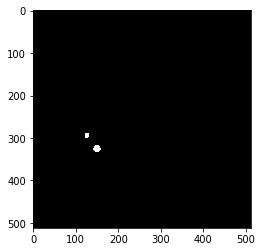

In [6]:
plt.imshow(np.load(images_path_nodule_mask[110]), cmap = plt.cm.bone)
plt.show()

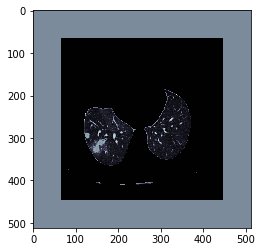

In [7]:
plt.imshow(np.load(images_path_lung_img[110]), cmap = plt.cm.bone)
plt.show()

In [8]:
##On charge nos .npz dans un numpy array
nodule_mask = np.load(images_path_nodule_mask[104])
lung_img = np.load(images_path_lung_img[104])

## Application d'un nodule_mask à une lung_img.npz

In [9]:
##PAS A METTRE DANS LE SCRIPT
nodule_segmented = get_nodule_segmented(nodule_mask,lung_img)

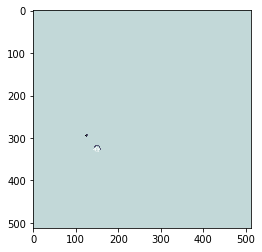

In [10]:
plt.imshow(nodule_segmented, cmap = plt.cm.bone)
plt.show()

In [11]:
##PAS A METTRE DANS LE SCRIPT
center_full, nb_nodules = get_centers_nodules(nodule_mask)

In [12]:
center_full

[(294.0, 126.0), (324.94618834080717, 150.0)]

In [18]:
##On prend un patch 2D de taille 32x32 autour de chaque nodule détecté
SIZE_PATCH = 32

##Attention à bien prendre toujours les coordonnees du centre d'un meme nodule, visualisez center_full pour être sur
first_nodule = nodule_segmented[int(center_full[0][0])-SIZE_PATCH/2:int(center_full[0][0])+SIZE_PATCH/2,int(center_full[0][1])-SIZE_PATCH/2:int(center_full[0][1])+SIZE_PATCH/2]

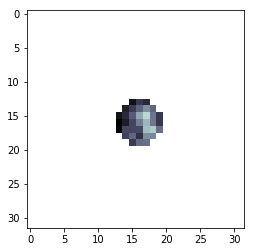

In [19]:
plt.imshow(first_nodule, cmap = plt.cm.bone)
plt.show()

## Passage en 3D

In [87]:
patients_path_lung_img = get_patients_path_lung_img(images_path_lung_img, id_patients[13])
patients_path_nodule_mask = get_patients_path_nodule_mask(images_path_nodule_mask, id_patients[13])

In [88]:
nodule_mask_3D = get_nodule_mask_3D(patients_path_nodule_mask)
lung_img_3D = get_lung_img_3D(patients_path_lung_img)

print(nodule_mask_3D.shape)
print(lung_img_3D.shape)

(512, 512, 17)
(512, 512, 17)


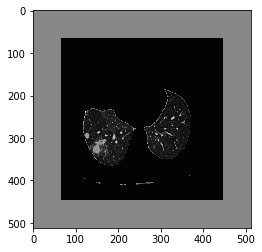

In [89]:
plt.imshow(lung_img_3D[:,:,9], cmap=plt.cm.gray)
plt.show()

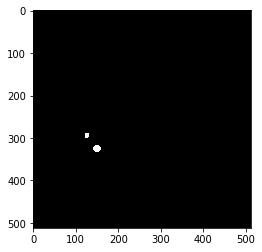

In [90]:
plt.imshow(nodule_mask_3D[:,:,9], cmap=plt.cm.gray)
plt.show()

In [91]:
%%time
nodule_segmented_3D = get_nodule_segmented_3D(patients_path_nodule_mask, patients_path_lung_img)

CPU times: user 1min 6s, sys: 1.31 s, total: 1min 7s
Wall time: 1min 7s


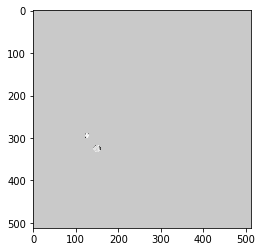

In [92]:
plt.imshow(nodule_segmented_3D[:,:,9], cmap=plt.cm.gray)
plt.show()

In [93]:
%%time
center_full_3D, nb_nodules_3D = get_center_nodules_3D(patients_path_nodule_mask)

CPU times: user 1min 1s, sys: 907 ms, total: 1min 2s
Wall time: 1min 1s


In [98]:
center_full_3D

[[(324.84313725490193, 150.0)],
 [(324.9191919191919, 150.0)],
 [(324.9136690647482, 150.0)],
 [(325.0, 150.0)],
 [(324.8128078817734, 150.0)],
 [(294.0, 126.0), (324.94618834080717, 150.0)],
 [(294.0, 126.0), (325.0, 150.0)],
 [(294.0, 126.0), (324.9020408163265, 150.0)],
 [(294.0, 126.0), (324.964, 150.0)],
 [(294.0, 126.0), (324.9020408163265, 150.0)],
 [(294.0, 126.0), (325.0, 150.0)],
 [(294.0, 126.0), (324.94618834080717, 150.0)],
 [(294.0, 126.0), (324.8128078817734, 150.0)],
 [(294.0, 126.0), (325.0, 150.0)],
 [(294.0, 126.0), (324.9136690647482, 150.0)],
 [(294.0, 126.0), (324.9191919191919, 150.0)],
 [(324.84313725490193, 150.0)]]

In [122]:
##On prend un patch 2D de taille 32x32 autour de chaque nodule détecté
SIZE_PATCH = 32

##Attention à bien prendre toujours les coordonnees du centre d'un meme nodule, visualiser center_full pour être sur
first_nodule_3D = np.zeros((first_nodule.shape[0], first_nodule.shape[1], SIZE_PATCH))
for i in range(0,len(center_full_3D)):
    first_nodule_3D[:,:,i] = nodule_segmented_3D[int(center_full_3D[i][-1][0])-SIZE_PATCH/2:int(center_full_3D[i][-1][0])+SIZE_PATCH/2,int(center_full_3D[i][-1][1])-SIZE_PATCH/2:int(center_full_3D[i][-1][1])+SIZE_PATCH/2,i]

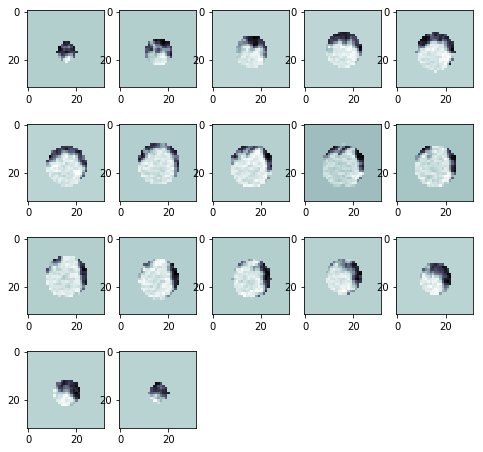

In [124]:
##Plot First Nodule

fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 4
for i in range(0, len(center_full_3D)):
    img = first_nodule_3D[:,:,i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img, cmap = plt.cm.bone)
plt.show()

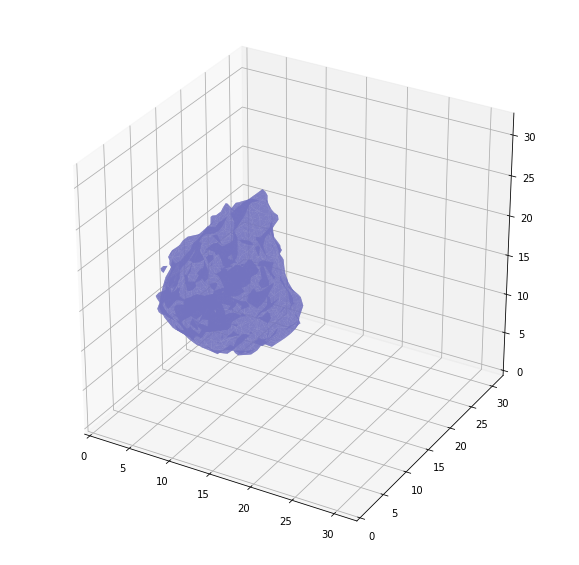

In [128]:
plot_3d(first_nodule_3D, 50)

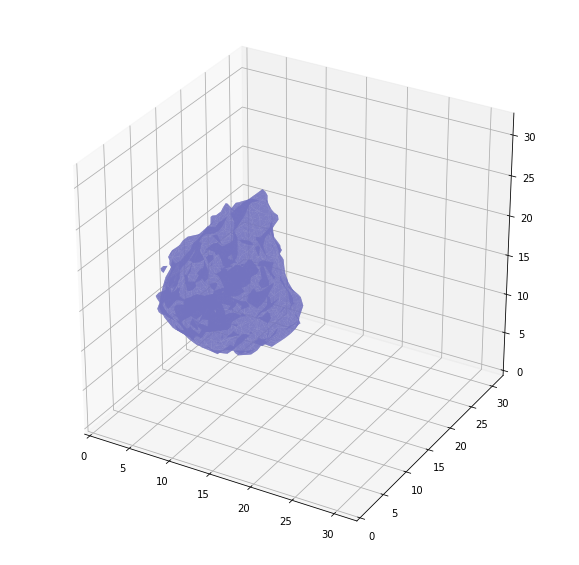

CPU times: user 2min 8s, sys: 2.4 s, total: 2min 11s
Wall time: 2min 10s


In [109]:
%%time

nodule_3D, center_full_3D = npz_to_cnn(images_path_lung_img, images_path_nodule_mask, id_patients[13])
plot_3d(nodule_3D, 50)

## Implémentation du CNN

In [129]:
from keras import layers
from keras import models
from keras import optimizers
from CNN_Classification import CNN_Classification

/Users/anthonypamart/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [131]:
model = CNN_Classification()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_3 (Conv3D)            (None, 30, 30, 30, 32)    896       
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 15, 15, 15, 32)    0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 13, 13, 13, 64)    55360     
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 6, 6, 6, 64)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 6, 6, 64)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 216)               2986200   
__________

In [132]:
train_images = np.reshape(nodule_3D, (1,32,32,32,1))
train_labels = np.zeros((1,1))
model.fit(train_images, train_labels, epochs=5, batch_size=1)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 1.0000e-07
Epoch 2/5
1/1 [==============================] - 0s 449ms/step - loss: 1.2853
Epoch 3/5
1/1 [==============================] - 0s 434ms/step - loss: 15.9424
Epoch 4/5
1/1 [==============================] - 0s 443ms/step - loss: 1.0000e-07
Epoch 5/5
1/1 [==============================] - 0s 464ms/step - loss: 1.0000e-07
